# Mode identifier on theta-space

In [1]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
from itertools import product as prod
from __class_PhononConfig import TwistedRealspacePhonon
from pymatgen.io.vasp.inputs import Poscar
%matplotlib inline

In [2]:
# Change as necessary
ROOT = '/Users/jonathanlu/Documents'
DIRNAME = "tvHet"
n_at = 6
THSPC_DIR = "theta"

In [3]:
th_min, th_max, ntheta = np.loadtxt(f"{ROOT}/{DIRNAME}/theta.txt")
ntheta = int(ntheta)
KPT = 'Gamma'
print(f"{ntheta} angles from {th_min} to {th_max}")

101 angles from 0.01 to 10.0


In [4]:
# Import dataset from the directory
log_name = r'$\Gamma$' if KPT == 'Gamma' else KPT
path = f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/thspc_mags.npy'
ppath = f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/thspc_phonons.npy'
poscars_uc = [Poscar.from_file(f'{ROOT}/{DIRNAME}/POSCAR_LAYER{i+1}') for i in range(2)]
dataset = np.load(path)
phonons = np.load(ppath)
nmodes = dataset.shape[1]
print("Dataset shape:", dataset.shape)
print("Number of modes:", nmodes)
thetas = np.linspace(th_min, th_max, ntheta)

DMs = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/dms.npy')
GM_set = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/GM_set.npy')
k_set = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/k_set.npy')
bl_M = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/masses.npy')
mesh = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/thspc_mesh.npy')
print(f"Mesh shape: {mesh.shape}")

Dataset shape: (101, 61, 1521, 3)
Number of modes: 61
Mesh shape: (101, 1521, 2)


In [5]:
# Identify the LB modes
LBs = [0]*ntheta
for i, tnsr in enumerate(phonons):
    tnsr = np.transpose(tnsr, axes=(1,0,2,3))
    LB_i = []
    for j, band in enumerate(tnsr):
        if np.all(band[0,:,2] > -1e-2) and np.mean(band[0,:,2]) > 1e-4 and np.all(band[1,:,2] < 1e-2):
            LB_i.append(j)
    print(f"[{round(thetas[i], 2)}] LB @ {LB_i}")
    LBs[i] = LB_i

[0.01] LB @ [13, 14, 23]
[0.11] LB @ [25]
[0.21] LB @ [8]
[0.31] LB @ [8, 25]
[0.41] LB @ [8]
[0.51] LB @ []
[0.61] LB @ [8, 23]
[0.71] LB @ [8, 23]
[0.81] LB @ [23]
[0.91] LB @ [7, 8, 23]
[1.01] LB @ [7, 8, 23]
[1.11] LB @ [7, 23]
[1.21] LB @ [6, 9, 23]
[1.31] LB @ [9, 10, 23]
[1.41] LB @ [9, 10, 17]
[1.51] LB @ [9, 10, 17]
[1.61] LB @ [10, 17]
[1.71] LB @ [9, 10, 17]
[1.81] LB @ [17]
[1.91] LB @ []
[2.01] LB @ [4]
[2.11] LB @ [4]
[2.21] LB @ [4]
[2.31] LB @ [4]
[2.41] LB @ [4]
[2.51] LB @ [4]
[2.61] LB @ [3, 4, 37, 38]
[2.71] LB @ [3, 4, 23]
[2.81] LB @ [3, 4, 17, 23, 39]
[2.91] LB @ [3, 4, 17, 23, 29, 39]
[3.01] LB @ [3, 4, 17, 29, 39]
[3.11] LB @ [3, 4, 17, 29, 39]
[3.21] LB @ [4, 17, 29, 39]
[3.31] LB @ [4, 29, 39]
[3.41] LB @ [4, 35, 39]
[3.51] LB @ [4, 17, 39]
[3.61] LB @ [4, 17, 39]
[3.71] LB @ [4]
[3.81] LB @ [4]
[3.91] LB @ [4]
[4.01] LB @ [4]
[4.11] LB @ [4, 45]
[4.21] LB @ [4, 45]
[4.31] LB @ [4]
[4.41] LB @ [4]
[4.51] LB @ [3, 4]
[4.61] LB @ [3, 4]
[4.71] LB @ [3, 4]
[4.81

In [6]:
# Identify the S modes
for i, tnsr in enumerate(phonons):
    tnsr = np.transpose(tnsr, axes=(1,0,2,3))
    Ss = []
    for j, band in enumerate(tnsr):
        reverse = np.all(np.abs(band[0] + band[1]) < 1e-2)
        if reverse and (j not in LBs[i]):
            Ss.append(j)
    print(f"[{round(thetas[i], 2)}] S @ {Ss}")

[0.01] S @ [42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
[0.11] S @ [23, 24, 28, 31, 32, 36, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
[0.21] S @ [24, 25, 26, 29, 31, 32, 36, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
[0.31] S @ [24, 26, 29, 31, 32, 36, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
[0.41] S @ [11, 23, 24, 26, 29, 31, 32, 36, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
[0.51] S @ [14, 23, 24, 26, 29, 31, 32, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
[0.61] S @ [13, 14, 17, 18, 24, 26, 29, 31, 32, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
[0.71] S @ [17, 24, 26, 29, 31, 32, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
[0.81] S @ [17, 20, 24, 26, 29, 31, 32, 39, 40, 42, 43, 44, 45, 46, 

Analyzing theta = 1.9081000000000001 (idx=19)


<Figure size 432x288 with 0 Axes>

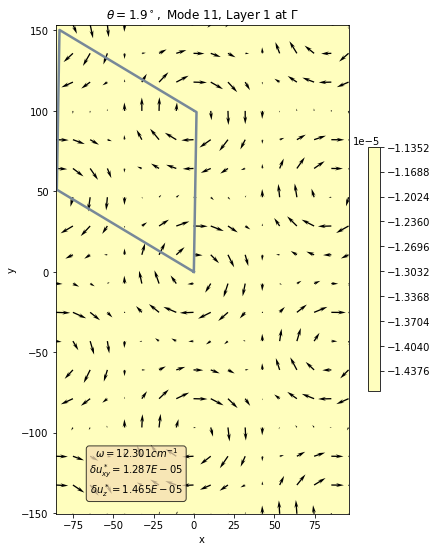

<Figure size 432x288 with 0 Axes>

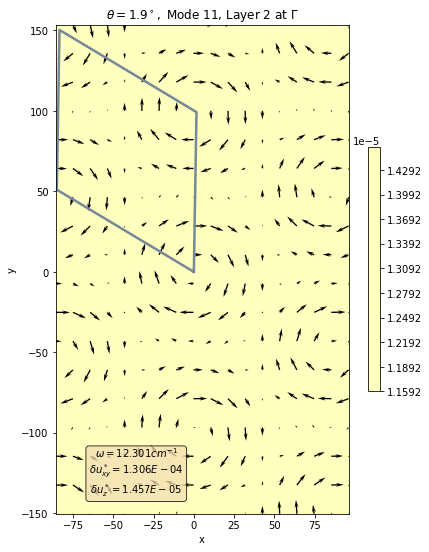

In [136]:
# Visualize the real-space phonons
THETA_IDX = 19
WHICH_MODE = 11
print(f"Analyzing theta = {thetas[THETA_IDX]} (idx={THETA_IDX})")
coords = mesh[THETA_IDX]

ph = TwistedRealspacePhonon(thetas[THETA_IDX], k_set[THETA_IDX], 
                            GM_set[THETA_IDX], DMs[THETA_IDX], n_at, 
                            bl_M, poscars_uc, modeidxs=np.arange(nmodes))
ph.plot_a_phonon(WHICH_MODE)